# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ashilpa Darrel Bumika
- **Email:** ashilpadarrel649@gmail.com
- **ID Dicoding:** darrell_ashl

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda dari tahun ke tahun?
- Bagaimana tren peminjaman sepeda berdasarkan bulan, hari, jam, musim, dan cuaca?
- Bagaimana perbandingan jumlah peminjam sepeda antara pengguna terdaftar dan pengguna biasa?
- Bagaimana perbandingan jumlah peminjam sepeda antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [80]:
day_df = pd.read_csv('./data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [81]:
hour_df = pd.read_csv('./data/hour.csv')
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- Kedua data memliki field yang sama tetapi hanya saja pada data 'hour_df', data dibagi menjadi per jam.

### Assessing Data

#### Menilai tabel `hour_df`

In [82]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [83]:
print("Duplicate data: ", day_df.duplicated().sum())

Duplicate data:  0


In [84]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [85]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [86]:
print("Duplicate data: ", hour_df.duplicated().sum())

Duplicate data:  0


In [87]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kedua data tidak memiliki data duplikat.
- Kedua data memiliki tipe data yang sesuai.
- Kedua data tidak memiliki data yang hilang.
- Kedua data masih menggunakan representasi angka untuk beberapa field.

### Cleaning Data

#### Membersihkan tabel `day_df`

##### Mengubah nilai representasi menjadi keterangan

In [88]:
day_df['season'] = day_df['season'].map({
    1: 'spring', 
    2: 'summer', 
    3: 'fall', 
    4: 'winter'
})

day_df['yr'] = day_df['yr'].map({
    0: 2011, 
    1: 2012
})

day_df['holiday'] = day_df['holiday'].map({
    0: 'no', 
    1: 'yes'
})

day_df['workingday'] = day_df['workingday'].map({
    0: 'no', 
    1: 'yes'
})

day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear', 
    2: 'Mist', 
    3: 'Light Rain/Snow', 
    4: 'Heavy Rain/Snow'
})

In [89]:
day_df['season'] = day_df['season'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')

In [90]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   dteday      731 non-null    object  
 2   season      731 non-null    category
 3   yr          731 non-null    int64   
 4   mnth        731 non-null    int64   
 5   holiday     731 non-null    category
 6   weekday     731 non-null    int64   
 7   workingday  731 non-null    category
 8   weathersit  731 non-null    category
 9   temp        731 non-null    float64 
 10  atemp       731 non-null    float64 
 11  hum         731 non-null    float64 
 12  windspeed   731 non-null    float64 
 13  casual      731 non-null    int64   
 14  registered  731 non-null    int64   
 15  cnt         731 non-null    int64   
dtypes: category(4), float64(4), int64(7), object(1)
memory usage: 72.1+ KB


#### Membersihkan tabel `hour_df`

##### Mengubah nilai representasi menjadi keterangan

In [91]:
hour_df['season'] = hour_df['season'].map({
    1: 'spring', 
    2: 'summer', 
    3: 'fall', 
    4: 'winter'
})

hour_df['yr'] = hour_df['yr'].map({
    0: 2011, 
    1: 2012
})

hour_df['holiday'] = hour_df['holiday'].map({
    0: 'no', 
    1: 'yes'
})

hour_df['workingday'] = hour_df['workingday'].map({
    0: 'no', 
    1: 'yes'
})

hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear', 
    2: 'Mist', 
    3: 'Light Rain/Snow', 
    4: 'Heavy Rain/Snow'
})

In [92]:
hour_df['season'] = hour_df['season'].astype('category')
hour_df['holiday'] = hour_df['holiday'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')

In [93]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  int64   
 4   mnth        17379 non-null  int64   
 5   hr          17379 non-null  int64   
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  int64   
 8   workingday  17379 non-null  category
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(4), float64(4), int64(8), object(1)
memory usage: 1.8+ MB


**Insight:**
- Kedua data sudah bersih dan siap untuk dilakukan analisis lebih lanjut.
- Kedua data sudah memiliki representasi yang lebih mudah dipahami.

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [94]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
300,301,2011-10-28,winter,2011,10,no,5,yes,Mist,0.330833,0.318812,0.585833,0.229479,456,3291,3747
87,88,2011-03-29,summer,2011,3,no,2,yes,Clear,0.302500,0.292908,0.314167,0.226996,317,2108,2425
402,403,2012-02-07,spring,2012,2,no,2,yes,Clear,0.354167,0.361104,0.496250,0.147379,199,4176,4375
645,646,2012-10-07,winter,2012,10,no,0,no,Mist,0.415833,0.419813,0.708333,0.141162,781,2729,3510
70,71,2011-03-12,spring,2011,3,no,6,no,Clear,0.329167,0.325750,0.594583,0.220775,724,1408,2132


In [95]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,NaN,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,fall,NaN,NaN,no,NaN,yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,NaN,710,NaN,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,6.519836,NaN,2.997264,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,3.451913,NaN,2.004787,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,1.000000,NaN,0.000000,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,4.000000,NaN,1.000000,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,2012.000000,7.000000,NaN,3.000000,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,2012.000000,10.000000,NaN,5.000000,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [96]:
yearly_trend  = day_df.groupby('yr', observed=False).agg({
    'cnt': 'mean'
})
yearly_trend.head()

,cnt
yr,
2011,3405.761644
2012,5599.934426


In [97]:
monthly_progress = day_df.groupby(['yr', 'mnth'], observed=False).agg({
    'cnt': 'sum'
}).reset_index()
monthly_progress['yr-mnth'] = monthly_progress['yr'].astype(str) + '-' + monthly_progress['mnth'].astype(str)
monthly_progress

,yr,mnth,cnt,yr-mnth
0,2011,1,38189,2011-1
1,2011,2,48215,2011-2
2,2011,3,64045,2011-3
3,2011,4,94870,2011-4
4,2011,5,135821,2011-5
5,2011,6,143512,2011-6
6,2011,7,141341,2011-7
7,2011,8,136691,2011-8
8,2011,9,127418,2011-9
9,2011,10,123511,2011-10


In [98]:
daily_trend = day_df.groupby('weekday', observed=False).agg({
    'cnt': ['max', 'min', 'sum', 'mean']
}).reset_index()
daily_trend['weekday'] = daily_trend['weekday'].map({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})
daily_trend

weekday   cnt                           
               max   min     sum         mean
0     Sunday  8227   605  444027  4228.828571
1     Monday  7525    22  455503  4338.123810
2    Tuesday  7767   683  469109  4510.663462
3  Wednesday  8173   441  473048  4548.538462
4   Thursday  7804   431  485395  4667.259615
5     Friday  8362  1167  487790  4690.288462
6   Saturday  8714   627  477807  4550.542857

In [99]:
seasonal_trend = day_df.groupby('season', observed=False).agg({
    'cnt': ['max', 'min', 'sum', 'mean']
})
seasonal_trend

cnt                            
         max   min      sum         mean
season                                  
fall    8714  1115  1061129  5644.303191
spring  7836   431   471348  2604.132597
summer  8362   795   918589  4992.331522
winter  8555    22   841613  4728.162921

In [100]:
workingday_trend = day_df.groupby('workingday', observed=False).agg({
    'cnt': ['sum', 'mean']
})
workingday_trend

cnt             
                sum         mean
workingday                      
no          1000269  4330.168831
yes         2292410  4584.820000

In [101]:
user_comparison = day_df.agg({
    'registered': ['sum', 'mean'],
    'casual': ['sum', 'mean']
}).map(lambda x: round(x, 2))
user_comparison

,registered,casual
sum,2672662.00,620017.00
mean,3656.17,848.18


**Insight:**
- Data terbagi menjadi beberapa kategori seperi tahun, bulan, hari, musim, hari kerja, dan tipe pengguna.
- Data tersebar tiap harinya dari tahun 2011 hingga 2012.

In [102]:
monthly_trend = day_df.groupby('mnth', observed=False).agg({
    'cnt': ['max', 'min', 'sum', 'mean']
})
monthly_trend

cnt                           
       max   min     sum         mean
mnth                                 
1     4521   431  134933  2176.338710
2     5062  1005  151352  2655.298246
3     8362   605  228920  3692.258065
4     7460   795  269094  4484.900000
5     8294  2633  331686  5349.774194
6     8120  3767  346342  5772.366667
7     8173  3285  344948  5563.677419
8     7865  1115  351194  5664.419355
9     8714  1842  345991  5766.516667
10    8156    22  322352  5199.225806
11    6852  1495  254831  4247.183333
12    6606   441  211036  3403.806452

### Explore `hour_df`

In [103]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1270,1271,2011-02-26,spring,2011,2,2,no,6,no,Clear,0.22,0.1970,0.60,0.3582,3,9,12
12175,12176,2012-05-27,summer,2012,5,12,no,0,no,Clear,0.74,0.6970,0.66,0.2537,301,269,570
16037,16038,2012-11-05,winter,2012,11,22,no,1,yes,Clear,0.28,0.2727,0.56,0.1940,4,111,115
7106,7107,2011-10-28,winter,2011,10,17,no,5,yes,Mist,0.36,0.3485,0.50,0.1343,35,411,446
12586,12587,2012-06-13,summer,2012,6,15,no,3,yes,Clear,0.72,0.6515,0.32,0.4925,65,216,281


In [104]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,NaN,NaN,2,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,fall,NaN,NaN,NaN,no,NaN,yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,NaN,NaN,16879,NaN,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,6.537775,11.546752,NaN,3.003683,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,3.438776,6.914405,NaN,2.005771,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,2011.000000,1.000000,0.000000,NaN,0.000000,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,2011.000000,4.000000,6.000000,NaN,1.000000,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,NaN,2012.000000,7.000000,12.000000,NaN,3.000000,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,NaN,2012.000000,10.000000,18.000000,NaN,5.000000,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [105]:
hourly_trend  = hour_df.groupby('hr', observed=False).agg({
    'cnt': ['max', 'min', 'sum', 'mean']
}).reset_index()
hourly_trend

hr  cnt                        
        max min     sum        mean
0    0  283   2   39130   53.898072
1    1  168   1   24164   33.375691
2    2  132   1   16352   22.869930
3    3   79   1    8174   11.727403
4    4   28   1    4428    6.352941
5    5   66   1   14261   19.889819
6    6  213   1   55132   76.044138
7    7  596   1  154171  212.064649
8    8  839   5  261001  359.011004
9    9  426  14  159438  219.309491
10  10  539   8  126257  173.668501
11  11  663  10  151320  208.143054
12  12  776   3  184414  253.315934
13  13  760  11  184919  253.661180
14  14  750  12  175652  240.949246
15  15  750   7  183149  251.233196
16  16  783  11  227748  311.983562
17  17  976  15  336860  461.452055
18  18  977  23  309772  425.510989
19  19  743  11  226789  311.523352
20  20  567  11  164550  226.030220
21  21  584   6  125445  172.314560
22  22  502   9   95612  131.335165
23  23  256   2   63941   87.831044

In [106]:
trend_by_weather = hour_df.groupby('weathersit', observed=False).agg({
    'cnt': ['max', 'min', 'sum', 'mean']
})
trend_by_weather

cnt                         
                 max min      sum        mean
weathersit                                   
Clear            977   1  2338173  204.869272
Heavy Rain/Snow  164  23      223   74.333333
Light Rain/Snow  891   1   158331  111.579281
Mist             957   1   795952  175.165493

**Insight:**
- Data terbagi menjadi beberapa kategori seperi tahun, bulan, hari, jam, musim, cuaca, hari kerja, dan tipe pengguna.
- Data tersebar tiap jamnya dari tahun 2011 hingga 2012.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

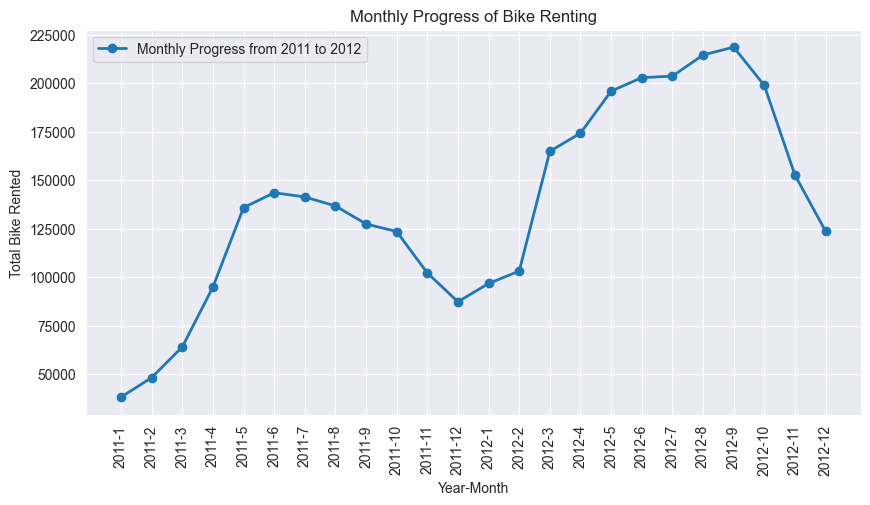

In [107]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_progress['yr-mnth'],
    monthly_progress['cnt'],
    marker='o',
    linewidth=2,
    label='Monthly Progress from 2011 to 2012'
)
plt.title('Monthly Progress of Bike Renting')
plt.xlabel('Year-Month')
plt.ylabel('Total Bike Rented')
plt.grid(True)
plt.legend()
plt.xticks(rotation=90)
plt.show()

**Insight:**
- Trend peminjaman sepeda dari tahun 2011 hingga 2012 mengalami peningkatan.
- Pada bulan-bulan tertentu, terjadi penurunan peminjaman sepeda.

### Pertanyaan 2:

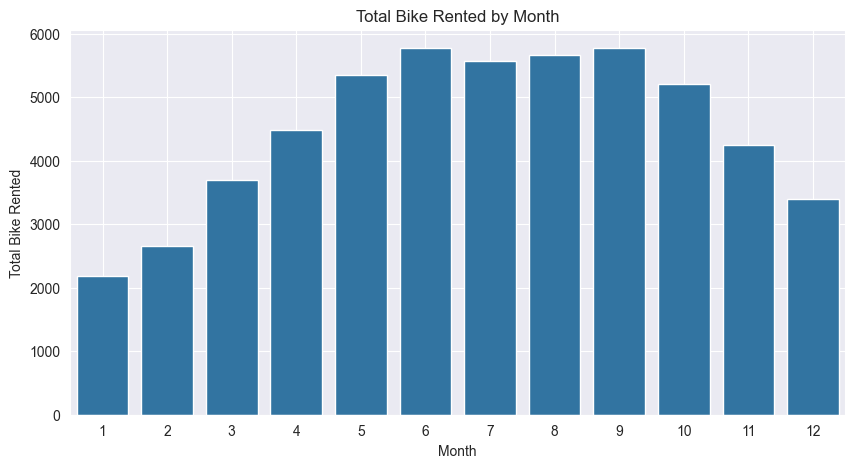

In [108]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x='mnth',
    y=('cnt', 'mean'),
    data=monthly_trend
)
plt.title('Total Bike Rented by Month')
plt.xlabel('Month')
plt.ylabel('Total Bike Rented')
plt.grid(True)
plt.show()

**Insight:**
- Puncak peminjaman sepeda terjadi pada perteengahan tahun hingga mendekati akhir tahun.
- Akhir tahun dan awal tahun terjadi penurunan peminjaman sepeda.

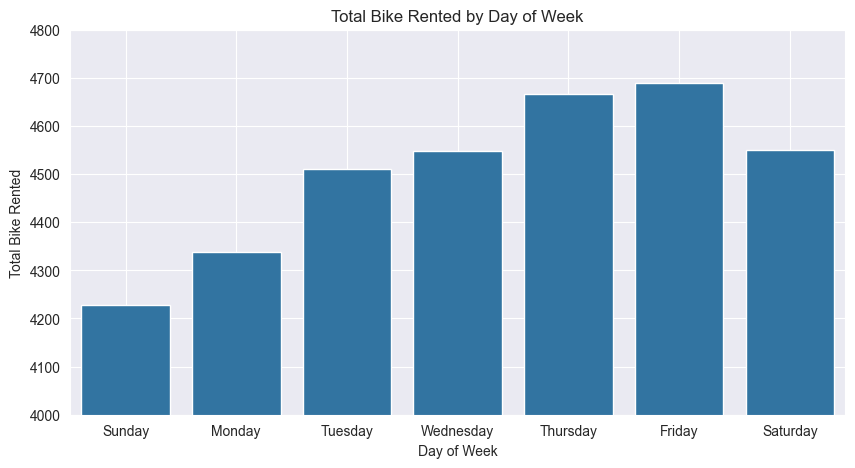

In [109]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x='weekday',
    y=('cnt', 'mean'),
    data=daily_trend,
)
plt.title('Total Bike Rented by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Bike Rented')
plt.ylim(4000, 4800)
plt.grid(True)
plt.show()

**Insight:**
- Peminjaman sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur.
- Peminjaman tertinggi terjadi pada hari Kamis hingga Jum'at

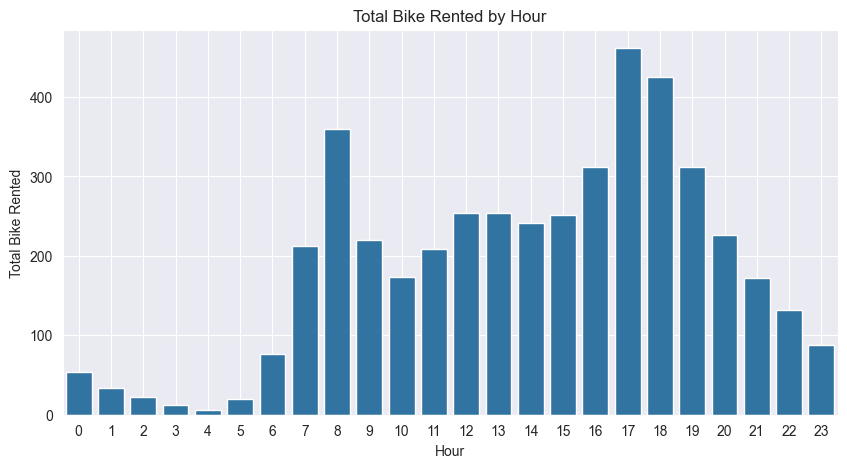

In [110]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x='hr',
    y=('cnt', 'mean'),
    data=hourly_trend
)
plt.title('Total Bike Rented by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Bike Rented')
plt.grid(True)
plt.show()

**Insight:**
- Peminjaman sepeda pada umummnya dilakukan pada jam-jam kerja.
- Peminjaman naik pada jam berangkat kerja yaitu sekitar jam 8 pagi dan jam pulang kerja yaitu sekitar jam 5-6 sore.

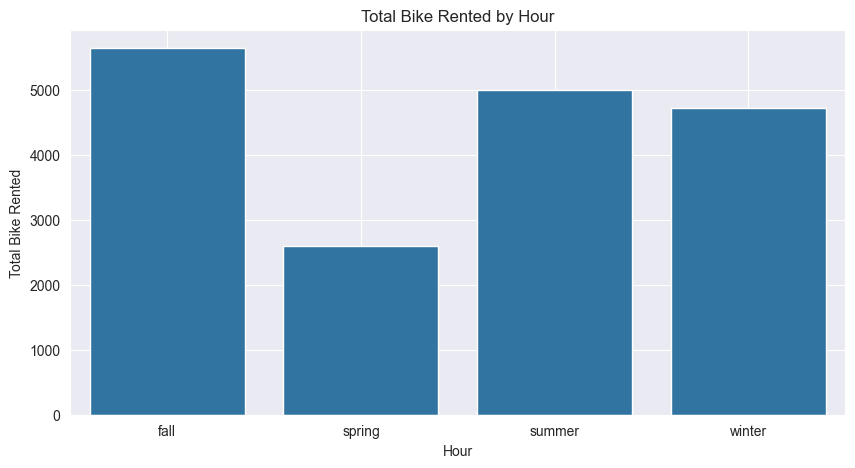

In [111]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x='season',
    y=('cnt', 'mean'),
    data=seasonal_trend
)
plt.title('Total Bike Rented by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Bike Rented')
plt.grid(True)
plt.show()

**Insight:**
- Pada musim semi menjadi musim dengan peminjaman sepeda paling rendah dibandingkan dengan musim lainnya.
- Musim-musim lainnya memiliki peminjaman sepeda yang hampir sama.

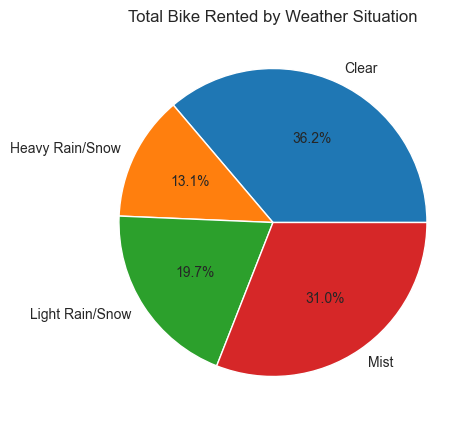

In [112]:
plt.figure(figsize=(10, 5))
plt.pie(
    x=trend_by_weather['cnt']['mean'],
    labels=trend_by_weather.index,
    autopct='%1.1f%%',
)
plt.title('Total Bike Rented by Weather Situation')
plt.grid(True)
plt.show()

**Insight:**
- Peminjaman sepeda lebih sering dilakukan pada cuaca yang cerah/berkabut daripada cuaca hujan/salju.

### Pertanyaan 3:

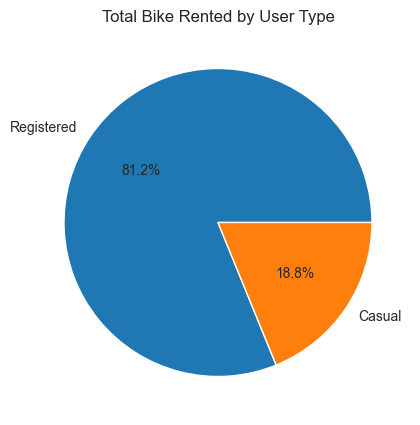

In [113]:
plt.figure(figsize=(10, 5))
plt.pie(
    x=[user_comparison['registered']['mean'], user_comparison['casual']['mean']],
    labels=['Registered', 'Casual'],
    autopct='%1.1f%%',
)
plt.title('Total Bike Rented by User Type')
plt.grid(True)
plt.show()

**Insight:**
- Peminjaman sepeda lebih banyak dilakukan oleh pengguna terdaftar dibandingkan dengan pengguna biasa.

### Pertanyaan 4:

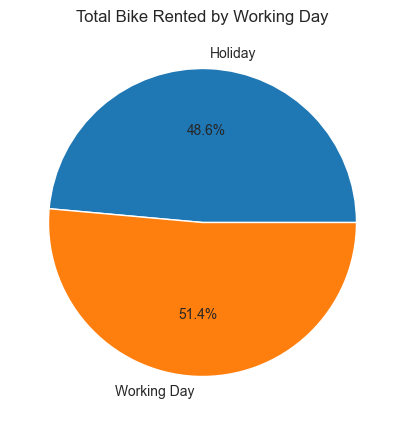

In [114]:
plt.figure(figsize=(10, 5))
plt.pie(
    x=workingday_trend['cnt']['mean'],
    labels=['Holiday', 'Working Day'],
    autopct='%1.1f%%',
)
plt.title('Total Bike Rented by Working Day')
plt.grid(True)
plt.show()

**Insight:**
- Peminjaman sepeda pada hari kerja sedikit lebih banyak dibandingkan dengan hari libur.
- Akan tetapi, perbedaannya tidak terlalu signifikan.

## Kesimpulan

- Tren penggunaan sepeda dari tahun ke tahun mengalami peningkatan.
- Peminjaman sepeda lebih tinggi pada bulan pertengahan hingga akhir tahun.
- Peminjaman sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur.
- Peminjaman sepeda lebih tinggi pada jam-jam kerja khususnya pada jam berangkat dan pulang kerja.
- Peminjaman sepeda pada musim semi lebih rendah dibandingkan dengan musim lainnya.
- Peminjaman sepeda lebih sering dilakukan pada cuaca yang cerah dan pada cuaca hujan/salju ringan.
- Pengguna terdaftar lebih banyak menggunakan sepeda dibandingkan dengan pengguna biasa.
- Peminjaman sepeda lebih banyak dilakukan pada hari kerja dibandingkan dengan hari libur tetapi perbedaannya tidak terlalu signifikan.